In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import random
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [24]:
CD = pd.read_csv('~/Desktop/Metaphlan4_MGX_CD.csv').set_index('Abundance').T
UC = pd.read_csv('~/Desktop/Metaphlan4_MGX_UC.csv').set_index('Abundance').T
Control = pd.read_csv('~/Desktop/Metaphlan4_MGX_Control.csv').set_index('Abundance').T

In [6]:
CD['diagnosis'] = 'CD'
UC['diagnosis'] = 'UC'
Control['diagnosis'] = 'Control'

Abundance,k__Bacteria,p__Bacteroidetes,p__Firmicutes,p__Proteobacteria,p__Actinobacteria,c__Bacteroidia,c__Betaproteobacteria,c__Clostridia,c__Actinobacteria,c__Negativicutes,...,t__SGB40196,t__SGB15179,t__SGB40190,t__SGB6328,t__SGB73859,t__SGB14211,t__SGB3321,t__SGB14046,t__SGB47427,t__SGB3986
PSM7J13U_P,100.0,84.41989,6.54845,6.20149,2.83017,84.41989,6.09688,5.10303,2.83017,1.30164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM7KONS_P,100.0,84.63850,14.59194,0.71052,0.00605,84.63850,0.70828,13.60089,0.00605,0.99105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HSM7CZ1T_P,100.0,84.94587,13.62430,0.96989,0.21573,84.94587,0.66343,13.03108,0.20400,0.45263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HSM5MD4W_P,100.0,82.33309,16.84980,0.55624,0.00700,82.33309,0.00000,14.76995,0.00700,1.95161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSM5LLGJ_P,100.0,40.49255,57.67258,0.49625,1.30860,40.49255,0.00000,56.74014,1.00844,0.62863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESM5GEZ6_P,100.0,56.94832,35.54776,5.05934,2.00566,56.94832,4.67151,32.73554,1.75421,0.71480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESM5MEDZ_P,100.0,78.58031,20.03432,1.35929,0.01047,78.58031,0.74902,18.67755,0.00000,0.71479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSM5LLFG_P,100.0,68.60624,29.37018,1.57101,0.01376,68.60624,0.00000,28.45850,0.01376,0.70887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCYU_P,100.0,43.21431,38.25443,0.52383,0.02466,43.21431,0.52383,34.25397,0.02466,4.00046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Combining_pheno = pd.concat([CD,UC,Control])

In [26]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)

In [7]:
Metaphlan4 = Combining_pheno.loc[select_sampels.index,:]
Metaphlan4 = Metaphlan4.loc[:,Metaphlan4.columns.str.startswith('s__')]
Metaphlan4["diagnosis"] = select_sampels.iloc[:,-1]
# Metaphlan4.reset_index(inplace=True)
Metaphlan4

Abundance,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__Streptococcus_agalactiae,s__Faecalicoccus_pleomorphus,s__Streptococcus_dysgalactiae,s__Corynebacterium_accolens,s__GGB39918_SGB47522,s__GGB3171_SGB4185,s__Slackia_piriformis,s__Bacteroidales_bacterium_KA00251,s__Parvimonas_sp_KA00067,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,36.02530,0.00000,1.91898,1.34449,0.03810,0.90627,0.00000,0.00000,17.15467,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD
CSM5MCVN,51.31297,0.95498,1.54371,0.04588,0.00000,0.00000,7.95270,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD
CSM67UBZ,0.00313,0.00000,0.00000,0.00000,0.00000,10.84042,1.39625,0.00000,16.65207,1.02143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UC
CSM5MCXL,32.29455,3.46622,0.00000,0.00000,0.71850,2.63304,0.00904,0.00000,12.83634,0.12034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UC
CSM5MCY8,0.00000,0.56787,0.00000,0.00000,0.30914,2.20589,0.00000,0.00000,8.33000,0.22200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,5.47393,1.38623,0.00000,0.02240,0.60937,4.65083,0.00000,0.71590,4.14365,0.00000,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,nonIBD
PSM6XBW3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,nonIBD
PSM7J12J,0.00515,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD


In [8]:
M_CD_B = Metaphlan4[Metaphlan4['diagnosis'] == "CD"].drop("diagnosis",axis=1)
M_UC_B = Metaphlan4[Metaphlan4['diagnosis'] == "UC"].drop("diagnosis",axis=1)
M_Control_B = Metaphlan4[Metaphlan4['diagnosis'] == "nonIBD"].drop("diagnosis",axis=1)
M_CD_B

Abundance,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__GGB2734_SGB3677,s__Streptococcus_agalactiae,s__Faecalicoccus_pleomorphus,s__Streptococcus_dysgalactiae,s__Corynebacterium_accolens,s__GGB39918_SGB47522,s__GGB3171_SGB4185,s__Slackia_piriformis,s__Bacteroidales_bacterium_KA00251,s__Parvimonas_sp_KA00067
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,36.02530,0.00000,1.91898,1.34449,0.03810,0.90627,0.00000,0.00000,17.15467,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCVN,51.31297,0.95498,1.54371,0.04588,0.00000,0.00000,7.95270,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCZ3,0.00000,0.00000,0.00000,0.30479,0.19031,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCWE,0.00000,0.00000,0.00000,0.77226,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM67UCK,14.39624,0.00000,0.00000,0.50987,0.00000,16.62301,1.25564,0.00000,9.14593,0.02199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCZF,16.56186,5.87824,0.00000,3.77646,0.69644,18.24435,0.00000,0.08565,18.67945,0.55186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM67UB1,26.28361,0.05007,0.98187,0.03832,0.01534,4.02696,2.37736,0.00000,2.38708,0.09588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM67UBB,0.00359,0.17720,0.00000,0.00000,0.00000,7.61430,2.65299,0.16354,0.00000,0.93762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM79HH8,7.72936,0.48122,0.00000,0.00000,0.00000,0.01443,2.64679,0.00000,4.68568,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Threshold = 0.1
M_CD = M_CD_B#[M_CD_B >= Threshold]
M_UC = M_UC_B#[M_UC_B >= Threshold]
M_Control = M_Control_B#[M_Control_B >= Threshold]
print(f'Dim_CD:{M_CD.shape}\tDim_UC:{M_UC.shape}\tDim_Control:{M_Control.shape}')

Dim_CD:(36, 1218)	Dim_UC:(24, 1218)	Dim_Control:(23, 1218)


In [10]:
###########
M_CD = M_CD.fillna(0)
M_CD[M_CD >= Threshold] = 1
M_CD[M_CD < Threshold] = 0
###########
M_UC = M_UC.fillna(0)
M_UC[M_UC >= Threshold] = 1
M_UC[M_UC < Threshold] = 0
###########
M_Control = M_Control.fillna(0)
M_Control[M_Control >= Threshold] = 1
M_Control[M_Control < Threshold] = 0

In [11]:
M_CD = M_CD.loc[:,(M_CD.sum() > M_CD.shape[0] * 0.1) & (M_CD.sum() < M_CD.shape[0]*0.9)]
M_UC = M_UC.loc[:, (M_UC.sum() > M_UC.shape[0] * 0.1)  & (M_UC.sum() < M_UC.shape[0]*0.9)]
M_Control = M_Control.loc[:, (M_Control.sum() > M_Control.shape[0] * 0.1)  & (M_Control.sum() < M_Control.shape[0]*0.9)]
print(f'Dim_CD:{M_CD.shape}\tDim_UC:{M_UC.shape}\tDim_Control:{M_Control.shape}')

Dim_CD:(36, 103)	Dim_UC:(24, 108)	Dim_Control:(23, 120)


In [12]:
random.seed(8)
M_CD_R = M_CD.apply(lambda x: np.random.permutation(x),)
M_UC_R = M_UC.apply(lambda x: np.random.permutation(x))
M_Control_R  = M_Control.apply(lambda x: np.random.permutation(x))

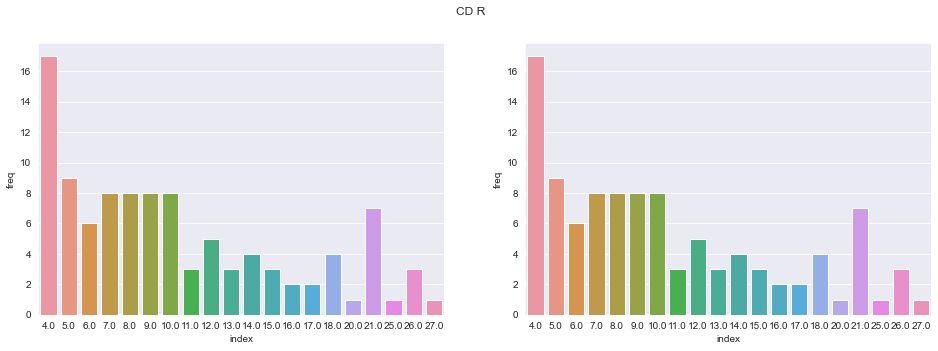

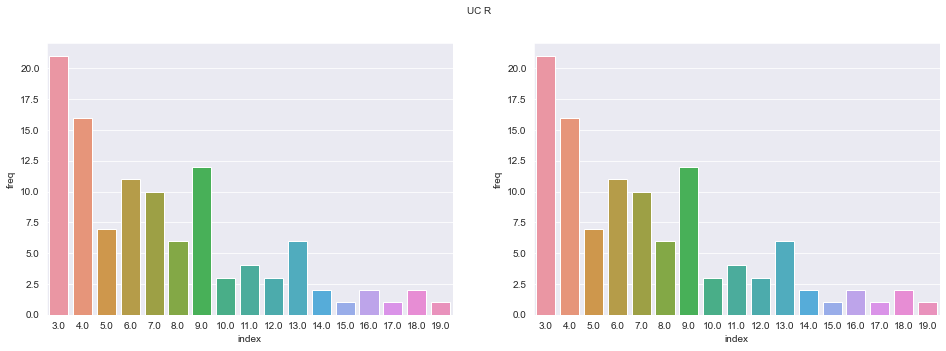

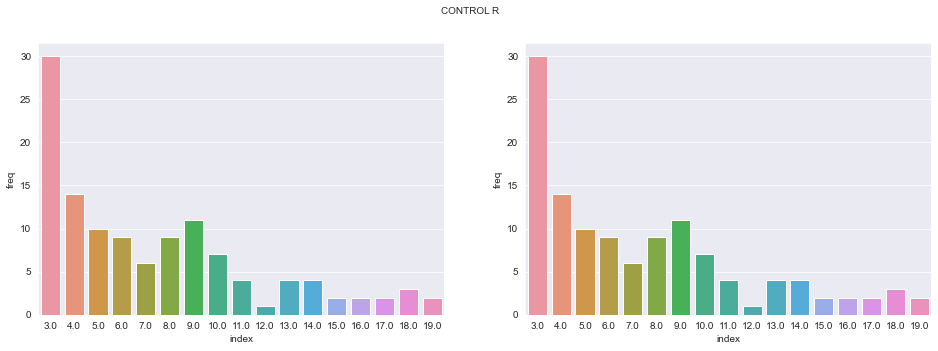

In [13]:
s_c_CD = pd.DataFrame(M_CD.sum().value_counts(), columns= ["freq"]).reset_index()
s_c_UC = pd.DataFrame(M_UC.sum().value_counts(), columns= ["freq"]).reset_index()
s_c_Control = pd.DataFrame(M_Control.sum().value_counts(), columns= ["freq"]).reset_index()
# randomizer
s_c_CD_R = pd.DataFrame(M_CD_R.sum().value_counts(), columns= ["freq"]).reset_index()
s_c_UC_R = pd.DataFrame(M_UC_R.sum().value_counts(), columns= ["freq"]).reset_index()
s_c_Control_R = pd.DataFrame(M_Control_R.sum().value_counts(), columns= ["freq"]).reset_index()


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.suptitle("CD")
sns.barplot(data=s_c_CD,x='index', y="freq")
plt.subplot(1,2,2)
plt.suptitle("CD R")
sns.barplot(data=s_c_CD_R,x='index', y="freq")
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.suptitle("UC",fontsize=10)
sns.barplot(data=s_c_UC,x='index', y="freq")
plt.subplot(1,2,2)
plt.suptitle("UC R",fontsize=10)
sns.barplot(data=s_c_UC_R,x='index', y="freq")
plt.show()


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.suptitle("CONTROL",fontsize=10)
sns.barplot(data=s_c_Control,x='index', y="freq")
plt.subplot(1,2,2)
plt.suptitle("CONTROL R",fontsize=10)
sns.barplot(data=s_c_Control_R,x='index', y="freq")
plt.show()


In [14]:
jac_sim_CD = 1 - pairwise_distances(M_CD.T, metric = "hamming")
jac_sim_CD = pd.DataFrame(jac_sim_CD, index=M_CD.columns, columns=M_CD.columns)

jac_sim_CD_R = 1 - pairwise_distances(M_CD_R.T, metric = "hamming")
jac_sim_CD_R = pd.DataFrame(jac_sim_CD_R, index=M_CD_R.columns, columns=M_CD_R.columns)

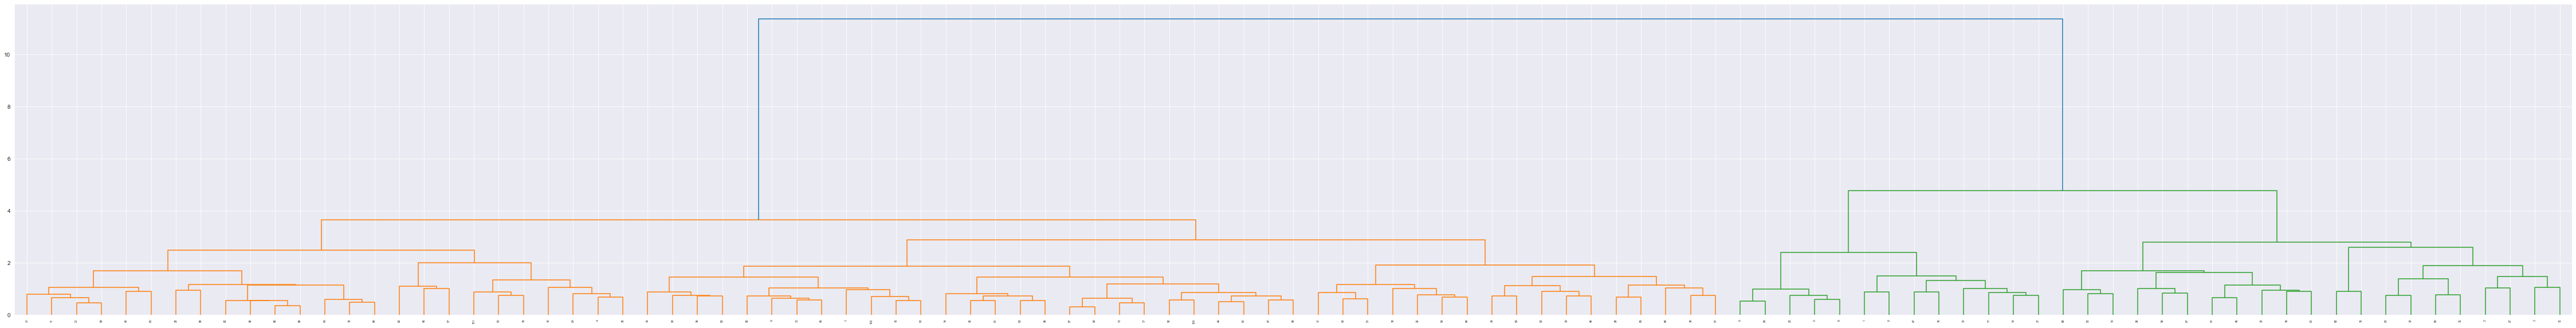

Abundance,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__GGB9635_SGB15106,s__Clostridium_symbiosum,s__Anaerobutyricum_hallii,s__Streptococcus_parasanguinis,s__Bifidobacterium_pseudocatenulatum,s__Acidaminococcus_intestini,s__GGB1420_SGB1957,s__Akkermansia_muciniphila,s__Paraprevotella_clara,0.1_clust
Abundance,,,,,,,,,,,,,,,,,,,,,
s__Phocaeicola_vulgatus,1.000000,0.611111,0.583333,0.416667,0.416667,0.777778,0.666667,0.361111,0.861111,0.361111,...,0.416667,0.305556,0.333333,0.305556,0.305556,0.416667,0.416667,0.500000,0.361111,1
s__Eubacterium_rectale,0.611111,1.000000,0.583333,0.583333,0.527778,0.722222,0.722222,0.527778,0.638889,0.583333,...,0.416667,0.305556,0.444444,0.472222,0.416667,0.472222,0.416667,0.500000,0.527778,1
s__Dialister_invisus,0.583333,0.583333,1.000000,0.444444,0.555556,0.583333,0.583333,0.444444,0.611111,0.555556,...,0.444444,0.500000,0.583333,0.555556,0.555556,0.500000,0.500000,0.527778,0.500000,1
s__Roseburia_faecis,0.416667,0.583333,0.444444,1.000000,0.666667,0.527778,0.361111,0.500000,0.555556,0.555556,...,0.555556,0.444444,0.527778,0.500000,0.500000,0.444444,0.388889,0.416667,0.611111,1
s__Roseburia_inulinivorans,0.416667,0.527778,0.555556,0.666667,1.000000,0.361111,0.361111,0.611111,0.444444,0.722222,...,0.722222,0.777778,0.694444,0.722222,0.666667,0.722222,0.666667,0.638889,0.722222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Bifidobacterium_pseudocatenulatum,0.305556,0.416667,0.555556,0.500000,0.666667,0.305556,0.416667,0.722222,0.333333,0.833333,...,0.777778,0.777778,0.805556,0.833333,1.000000,0.777778,0.833333,0.638889,0.833333,1
s__Acidaminococcus_intestini,0.416667,0.472222,0.500000,0.444444,0.722222,0.250000,0.527778,0.722222,0.333333,0.722222,...,0.777778,0.833333,0.750000,0.777778,0.777778,1.000000,0.833333,0.694444,0.833333,1
s__GGB1420_SGB1957,0.416667,0.416667,0.500000,0.388889,0.666667,0.305556,0.416667,0.722222,0.388889,0.777778,...,0.777778,0.777778,0.805556,0.777778,0.833333,0.833333,1.000000,0.750000,0.777778,1


In [15]:
dist_sin = linkage(jac_sim_CD, method='ward', metric='euclidean')
Cluster_CD = jac_sim_CD.copy()
plt.figure(figsize=(80, 10))
dendrogram(dist_sin)
plt.show()
Cluster_CD['0.1_clust'] = fcluster(dist_sin,0.1, criterion='maxclust')
Cluster_CD['0.1_clust'].value_counts().head()
Cluster_CD

In [16]:
Name_Hierarchical_CD = pd.read_csv('~/Desktop/Metaphlan4_set_species_CD.csv')
Name_Hierarchical_CD.set_index('Unnamed: 0',inplace=True)
sum_samples = pd.DataFrame(M_CD.sum())
HCD = Cluster_CD.join(sum_samples)
Hierarchical_CD = HCD.join(Name_Hierarchical_CD)
Hierarchical_CD.rename(columns={Hierarchical_CD.columns[-1]:'Hierarchical', Hierarchical_CD.columns[-2]:'Sum_Samples'}, inplace=True)
# Hierarchical_CD = Hierarchical_CD.loc[Hierarchical_CD['0.1_clust'] == 164,:]
display(Hierarchical_CD)

,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__Anaerobutyricum_hallii,s__Streptococcus_parasanguinis,s__Bifidobacterium_pseudocatenulatum,s__Acidaminococcus_intestini,s__GGB1420_SGB1957,s__Akkermansia_muciniphila,s__Paraprevotella_clara,0.1_clust,Sum_Samples,Hierarchical
Abundance,,,,,,,,,,,,,,,,,,,,,
s__Phocaeicola_vulgatus,1.000000,0.611111,0.583333,0.416667,0.416667,0.777778,0.666667,0.361111,0.861111,0.361111,...,0.333333,0.305556,0.305556,0.416667,0.416667,0.500000,0.361111,1,25.0,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Eubacterium_rectale,0.611111,1.000000,0.583333,0.583333,0.527778,0.722222,0.722222,0.527778,0.638889,0.583333,...,0.444444,0.472222,0.416667,0.472222,0.416667,0.500000,0.527778,1,21.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Dialister_invisus,0.583333,0.583333,1.000000,0.444444,0.555556,0.583333,0.583333,0.444444,0.611111,0.555556,...,0.583333,0.555556,0.555556,0.500000,0.500000,0.527778,0.500000,1,16.0,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...
s__Roseburia_faecis,0.416667,0.583333,0.444444,1.000000,0.666667,0.527778,0.361111,0.500000,0.555556,0.555556,...,0.527778,0.500000,0.500000,0.444444,0.388889,0.416667,0.611111,1,18.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Roseburia_inulinivorans,0.416667,0.527778,0.555556,0.666667,1.000000,0.361111,0.361111,0.611111,0.444444,0.722222,...,0.694444,0.722222,0.666667,0.722222,0.666667,0.638889,0.722222,1,8.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Bifidobacterium_pseudocatenulatum,0.305556,0.416667,0.555556,0.500000,0.666667,0.305556,0.416667,0.722222,0.333333,0.833333,...,0.805556,0.833333,1.000000,0.777778,0.833333,0.638889,0.833333,1,4.0,k__Bacteria|p__Actinobacteria|c__Actinobacteri...
s__Acidaminococcus_intestini,0.416667,0.472222,0.500000,0.444444,0.722222,0.250000,0.527778,0.722222,0.333333,0.722222,...,0.750000,0.777778,0.777778,1.000000,0.833333,0.694444,0.833333,1,4.0,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...
s__GGB1420_SGB1957,0.416667,0.416667,0.500000,0.388889,0.666667,0.305556,0.416667,0.722222,0.388889,0.777778,...,0.805556,0.777778,0.833333,0.833333,1.000000,0.750000,0.777778,1,4.0,k__Bacteria|p__Bacteroidetes|c__CFGB602|o__OFG...


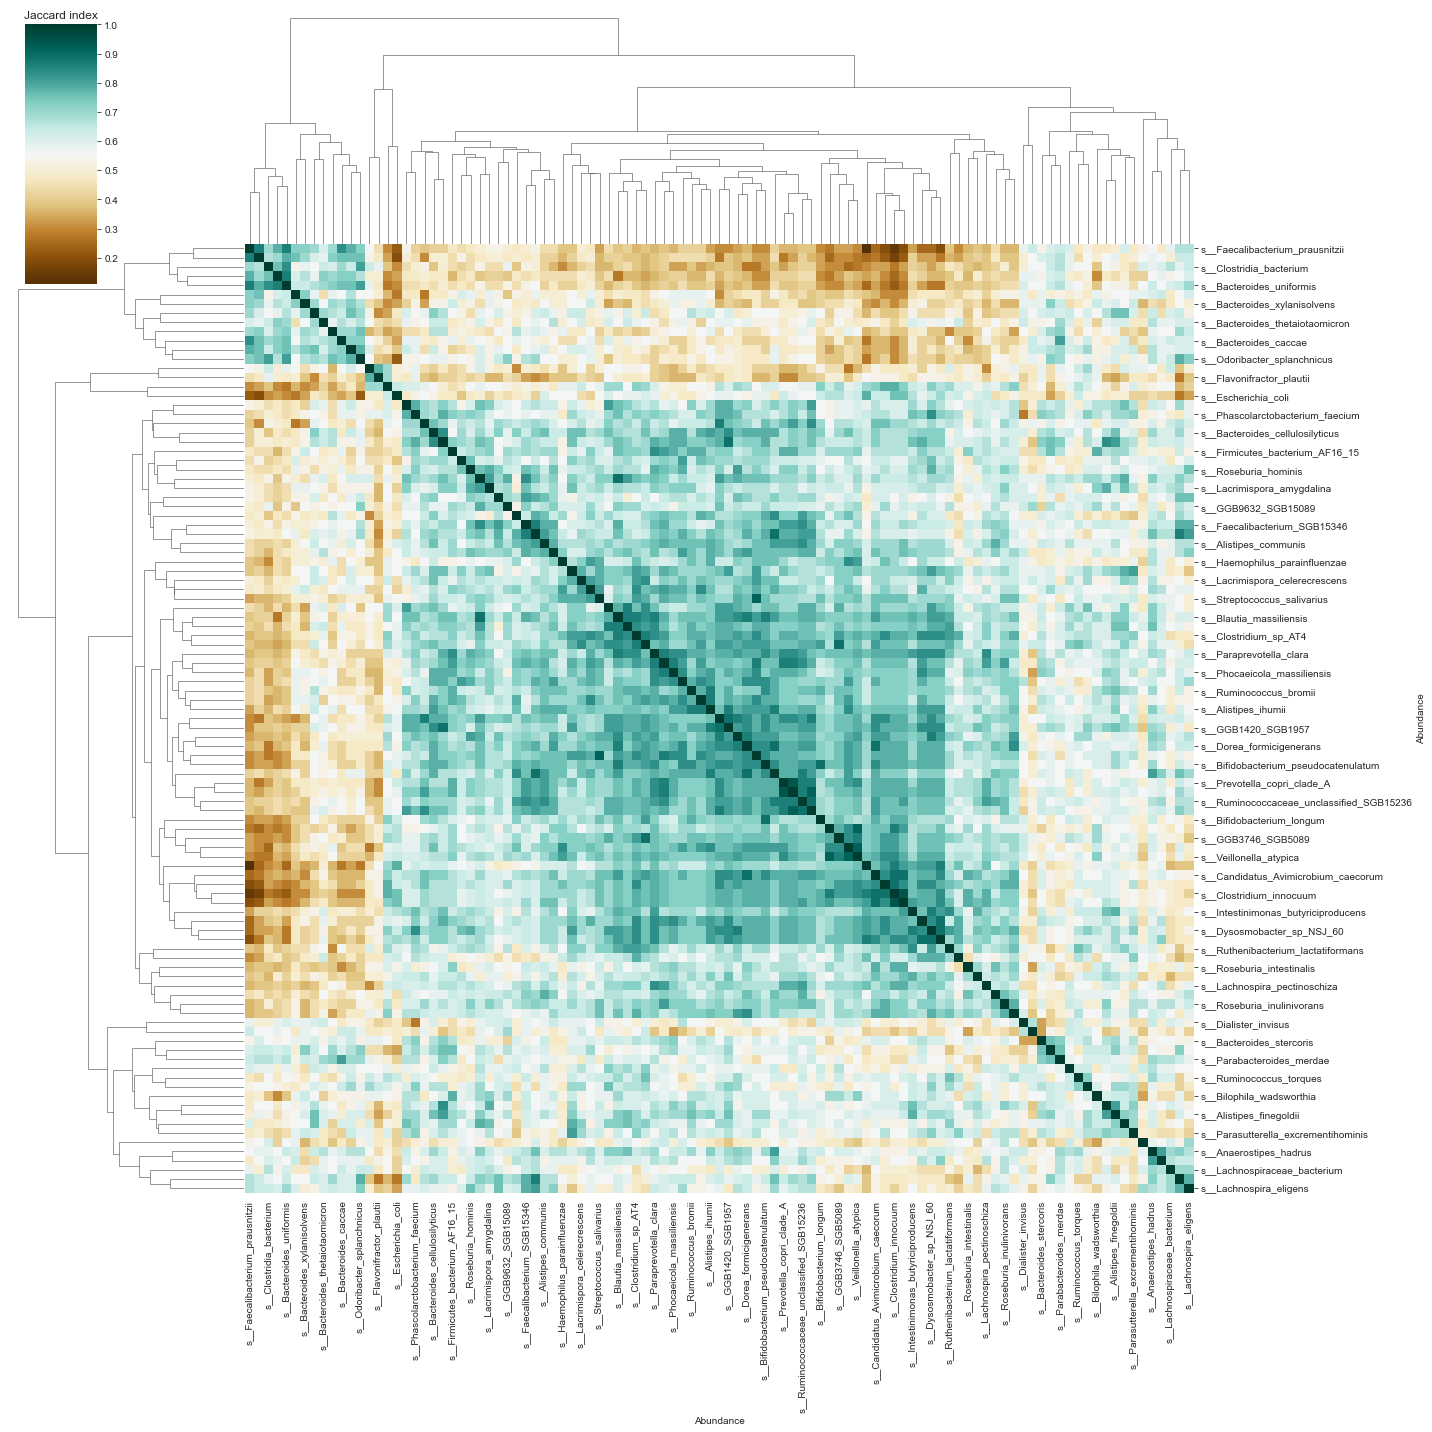

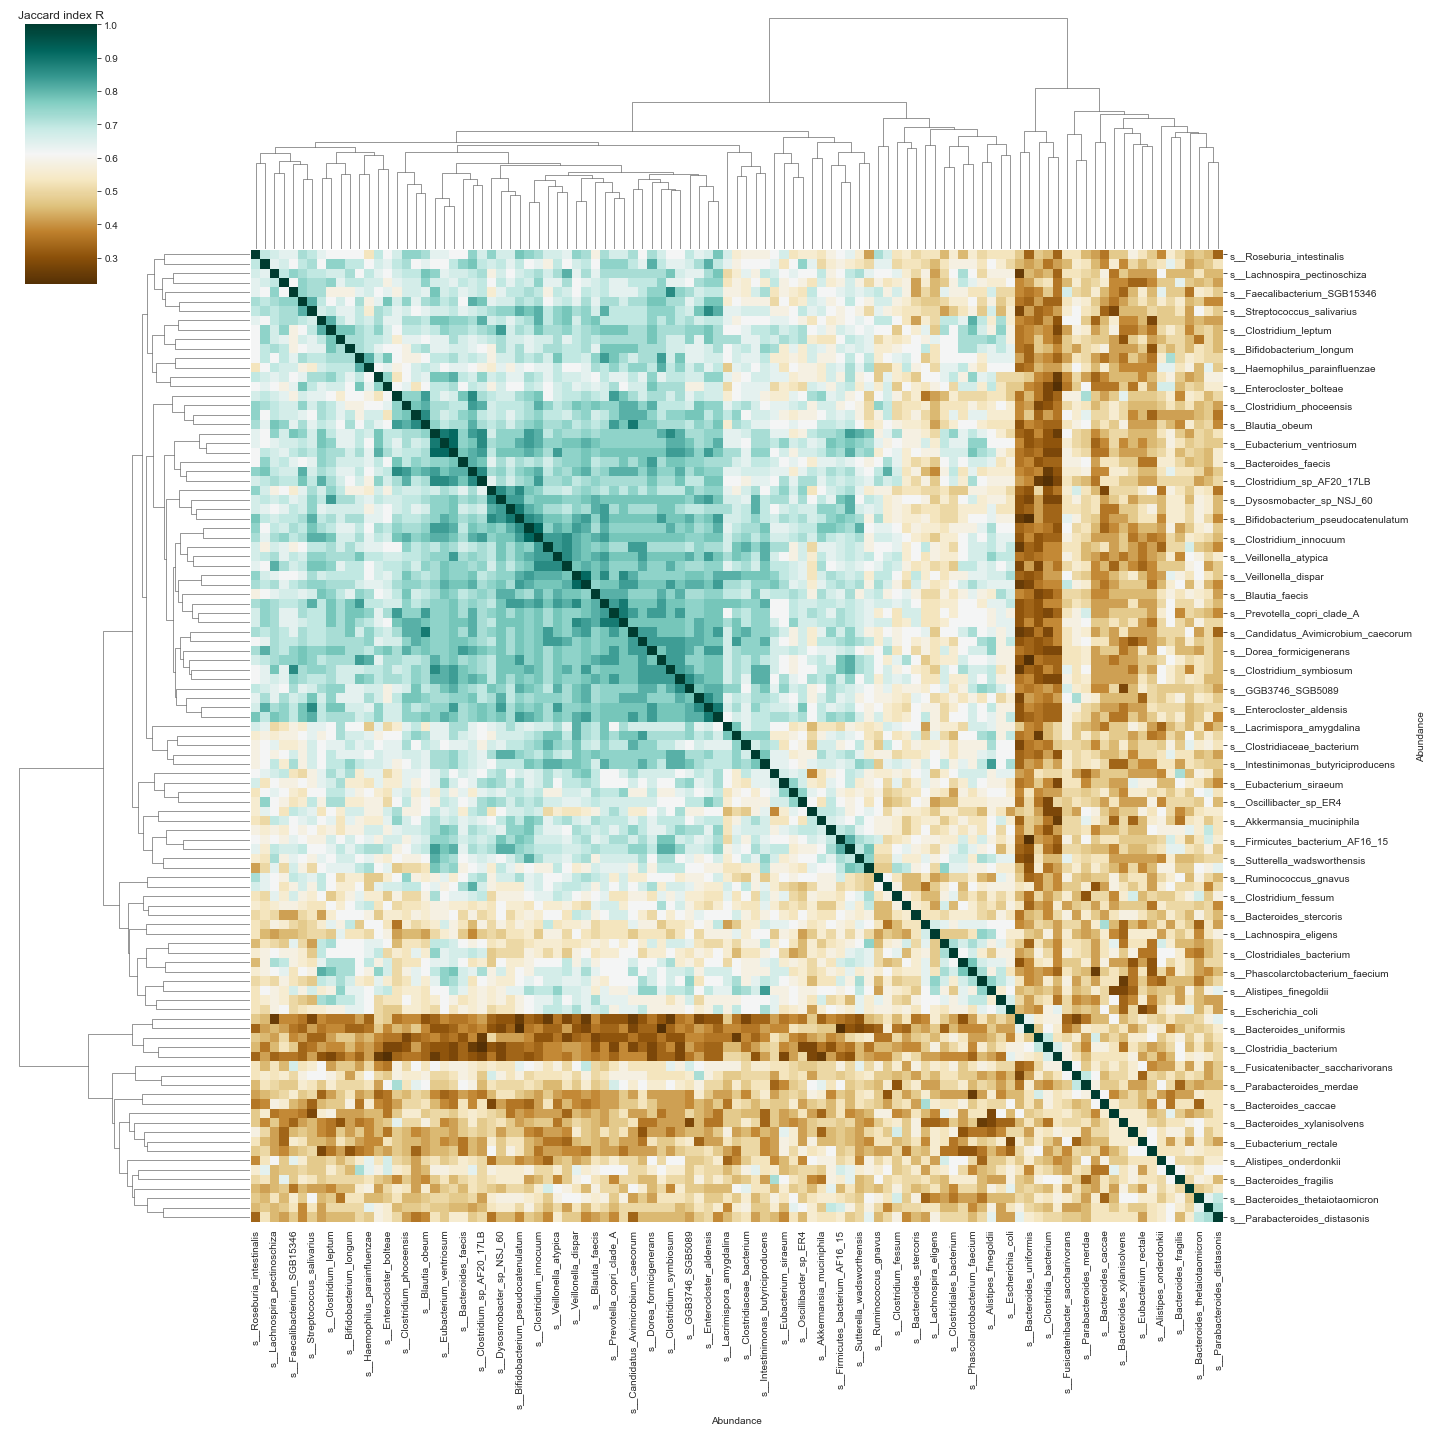

In [17]:
cluster_plot_CD = sns.clustermap(jac_sim_CD, cmap='BrBG', figsize=(20, 20))
plt.title('Jaccard index')
plt.show()

cluster_plot_CD_R = sns.clustermap(jac_sim_CD_R, cmap='BrBG', figsize=(20, 20))
plt.title('Jaccard index R')
plt.show()

In [20]:
plt.show()
jac_sim_UC = 1 - pairwise_distances(M_UC.T, metric="hamming")
jac_sim_UC = pd.DataFrame(jac_sim_UC, index=M_UC.columns, columns=M_UC.columns)

jac_sim_UC_R = 1 - pairwise_distances(M_UC_R.T, metric="hamming")
jac_sim_UC_R = pd.DataFrame(jac_sim_UC_R, index=M_UC_R.columns, columns=M_UC_R.columns)

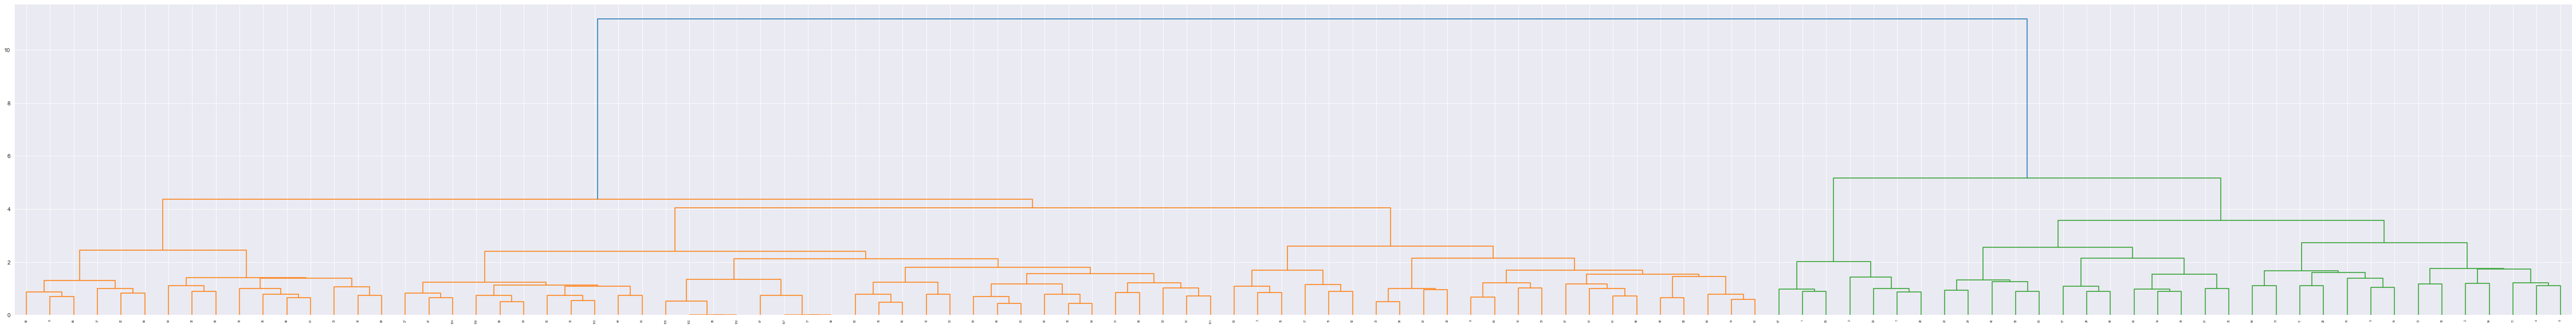

1    108
Name: 0.1_clust, dtype: int64

In [21]:
dist_sin = linkage(jac_sim_UC, method='ward', metric='euclidean')
Cluster_UC = jac_sim_UC.copy()
plt.figure(figsize=(80, 10))
dendrogram(dist_sin)
plt.show()
Cluster_UC['0.1_clust'] = fcluster(dist_sin,0.1, criterion='maxclust')
Cluster_UC['0.1_clust'].value_counts().head()

In [24]:
Name_Hierarchical_UC = pd.read_csv('~/Desktop/Metaphlan4_set_species_UC.csv')
Name_Hierarchical_UC.set_index('Unnamed: 0',inplace=True)
sum_samples = pd.DataFrame(M_UC.sum())
HUC = Cluster_UC.join(sum_samples)
Hierarchical_UC = HUC.join(Name_Hierarchical_UC)
Hierarchical_UC.rename(columns={Hierarchical_UC.columns[-1]:'Hierarchical', Hierarchical_UC.columns[-2]:'Sum_Samples'}, inplace=True)
# Hierarchical_UC.loc[Hierarchical_UC['0.1_clust'] == 92,:]
# M_UC_B.loc[:,['s__Dialister_hominis','s__Bacteroides_oleiciplenus','s__GGB9478_SGB14872']]
Hierarchical_UC

,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,s__Roseburia_intestinalis,...,s__Clostridium_sp_AF34_13,s__GGB9633_SGB15091,s__GGB6613_SGB9347,s__Akkermansia_muciniphila,s__Lachnospira_sp_NSJ_43,s__Clostridia_unclassified_SGB6317,s__Coprococcus_eutactus,0.1_clust,Sum_Samples,Hierarchical
Abundance,,,,,,,,,,,,,,,,,,,,,
s__Phocaeicola_vulgatus,1.000000,0.666667,0.375000,0.541667,0.500000,0.625000,0.375000,0.708333,0.291667,0.458333,...,0.333333,0.291667,0.291667,0.333333,0.333333,0.291667,0.375000,1,18.0,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Eubacterium_rectale,0.666667,1.000000,0.458333,0.541667,0.666667,0.458333,0.375000,0.625000,0.541667,0.541667,...,0.333333,0.458333,0.458333,0.416667,0.500000,0.375000,0.375000,1,16.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Dialister_invisus,0.375000,0.458333,1.000000,0.666667,0.541667,0.500000,0.583333,0.333333,0.416667,0.583333,...,0.541667,0.500000,0.500000,0.625000,0.458333,0.583333,0.500000,1,9.0,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...
s__Roseburia_faecis,0.541667,0.541667,0.666667,1.000000,0.458333,0.583333,0.750000,0.416667,0.583333,0.666667,...,0.625000,0.666667,0.666667,0.541667,0.708333,0.666667,0.750000,1,7.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Roseburia_inulinivorans,0.500000,0.666667,0.541667,0.458333,1.000000,0.458333,0.625000,0.541667,0.541667,0.625000,...,0.583333,0.541667,0.625000,0.583333,0.500000,0.458333,0.458333,1,12.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__GGB6613_SGB9347,0.291667,0.458333,0.500000,0.666667,0.625000,0.416667,0.750000,0.333333,0.833333,0.583333,...,0.791667,0.916667,1.000000,0.791667,0.875000,0.750000,0.833333,1,3.0,k__Bacteria|p__Proteobacteria|c__Alphaproteoba...
s__Akkermansia_muciniphila,0.333333,0.416667,0.625000,0.541667,0.583333,0.375000,0.708333,0.208333,0.791667,0.458333,...,0.750000,0.791667,0.791667,1.000000,0.750000,0.791667,0.791667,1,4.0,k__Bacteria|p__Verrucomicrobia|c__Verrucomicro...
s__Lachnospira_sp_NSJ_43,0.333333,0.500000,0.458333,0.708333,0.500000,0.458333,0.708333,0.375000,0.875000,0.625000,...,0.750000,0.958333,0.875000,0.750000,1.000000,0.791667,0.875000,1,4.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...


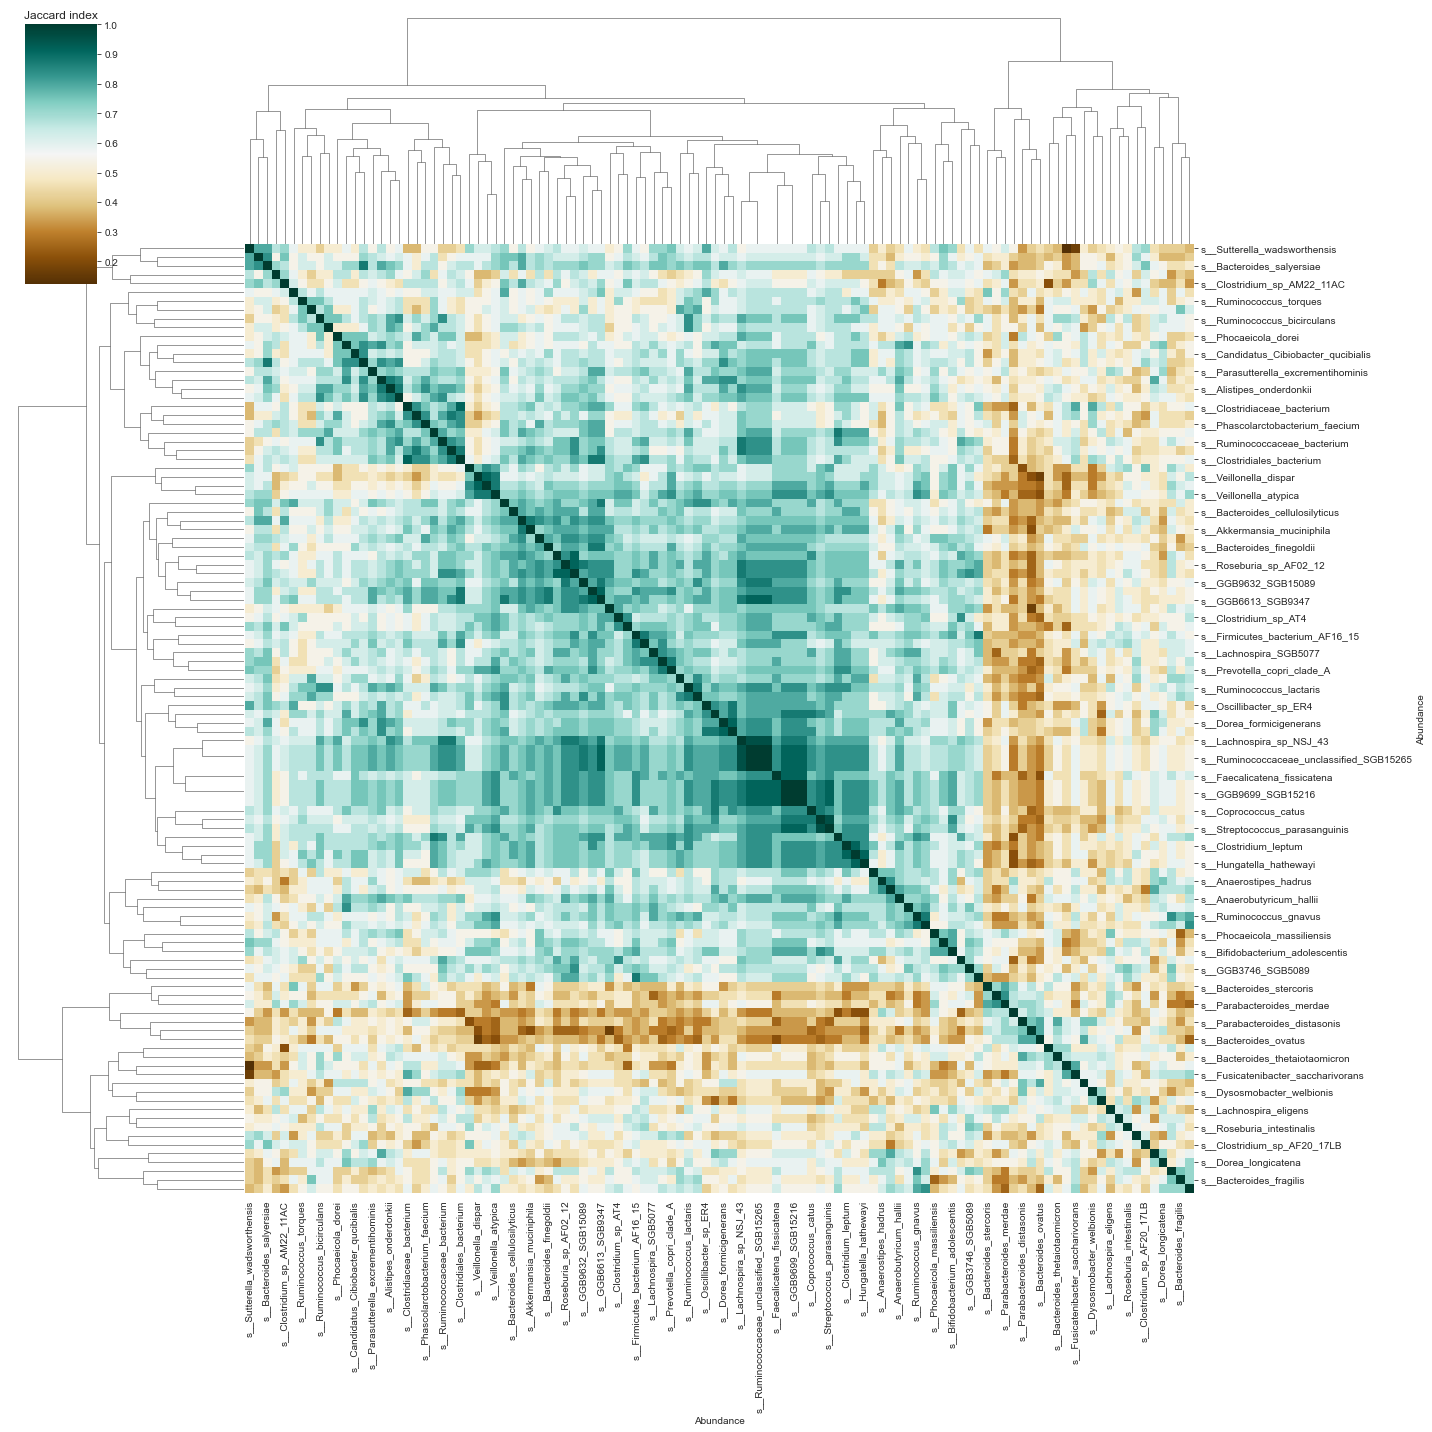

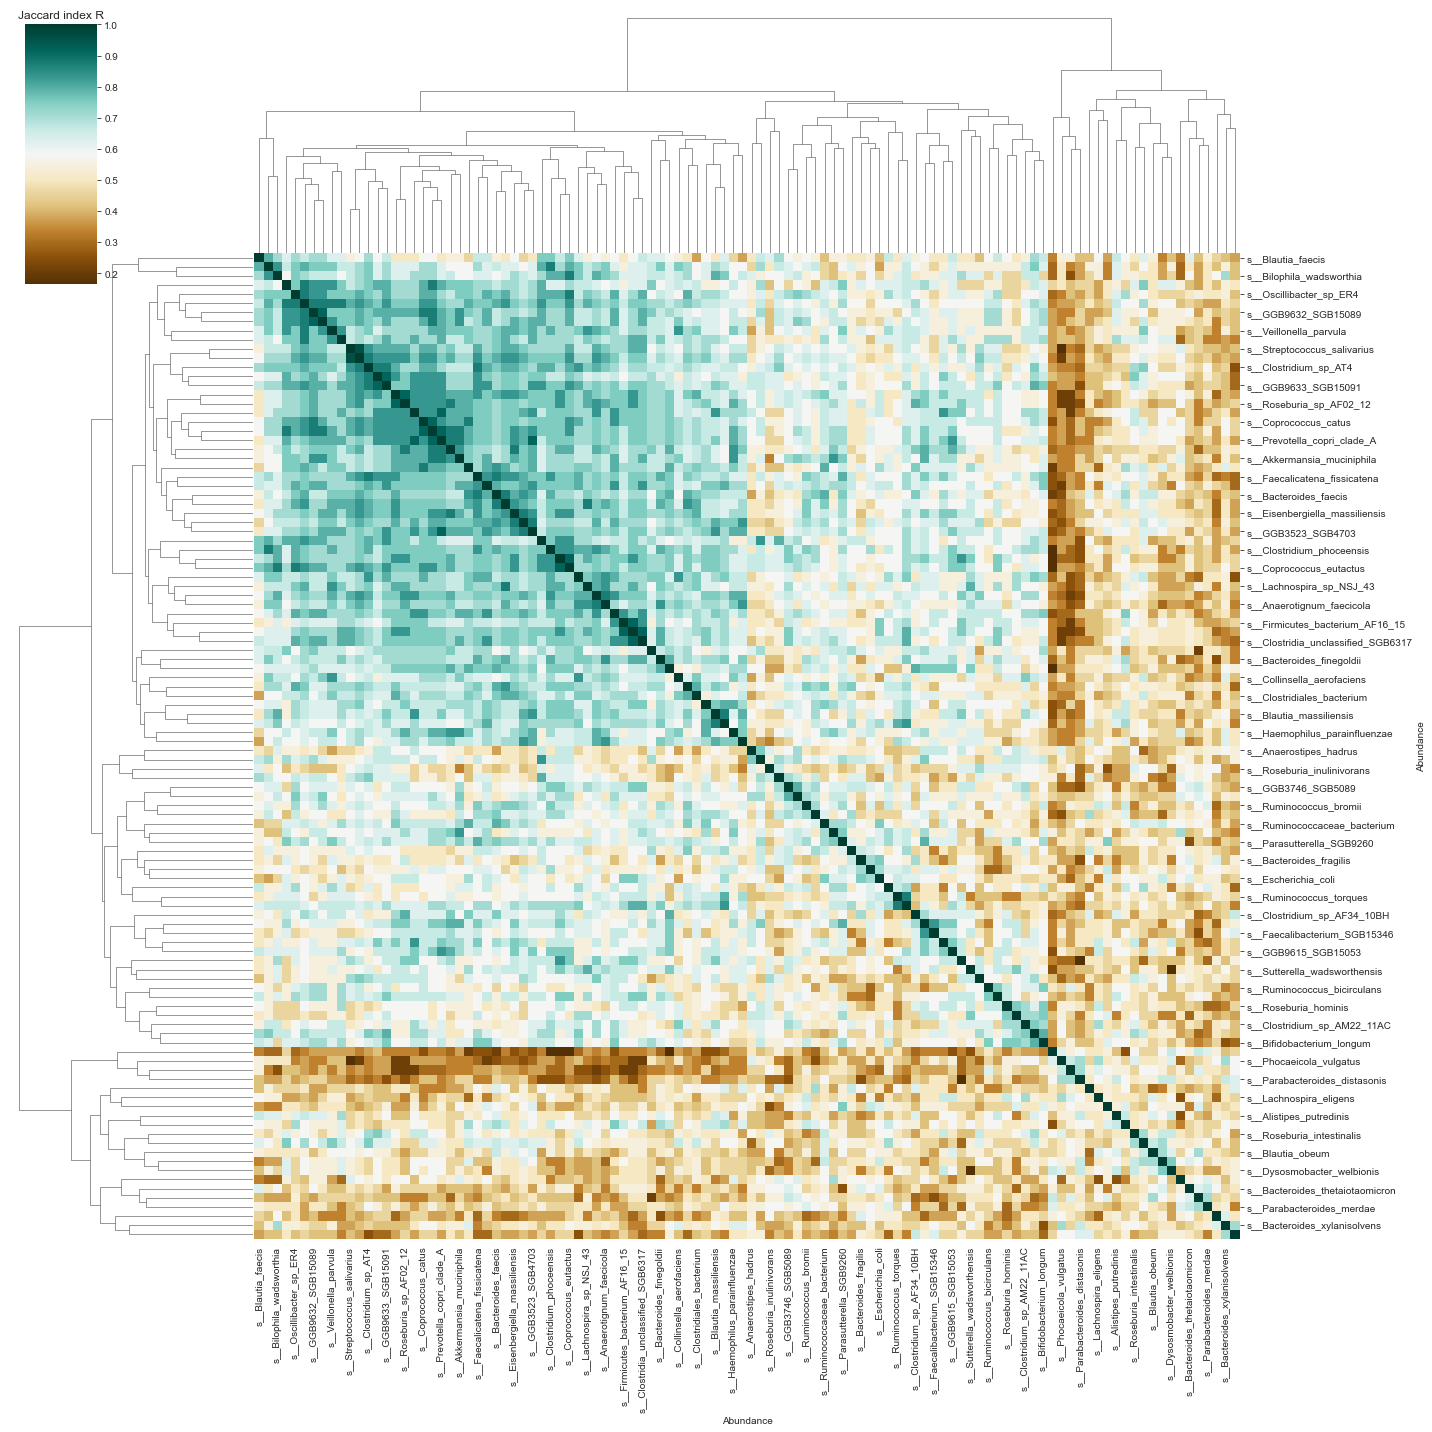

In [33]:
sns.clustermap(jac_sim_UC, cmap='BrBG',figsize=(20, 20))
plt.title('Jaccard index')
plt.show()

cluster_plot_UC_R = sns.clustermap(jac_sim_UC_R, cmap='BrBG', figsize=(20, 20))
plt.title('Jaccard index R')
plt.show()

In [26]:
jac_sim_Control = 1 - pairwise_distances(M_Control.T, metric = "hamming")
jac_sim_Control = pd.DataFrame(jac_sim_Control, index=M_Control.columns, columns=M_Control.columns)

jac_sim_Control_R = 1 - pairwise_distances(M_Control_R.T, metric = "hamming")
jac_sim_Control_R = pd.DataFrame(jac_sim_Control_R, index=M_Control_R.columns, columns=M_Control_R.columns)

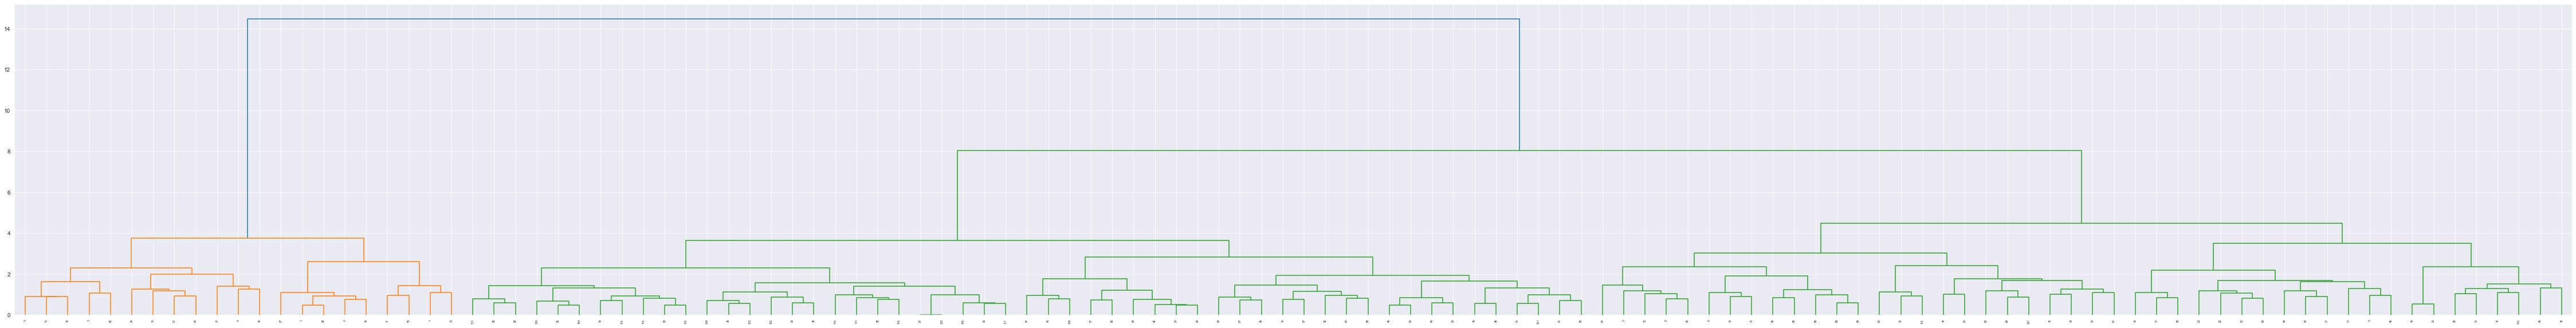

2    53
3    46
1    21
Name: 0.1_clust, dtype: int64

In [27]:
dist_sin = linkage(jac_sim_Control, method='ward', metric='euclidean')
Cluster_Control = jac_sim_Control.copy()
plt.figure(figsize=(80, 10))
dendrogram(dist_sin)
plt.show()
Cluster_Control['0.1_clust'] = fcluster(dist_sin,3, criterion='maxclust')
Cluster_Control['0.1_clust'].value_counts().head()

In [28]:
Name_Hierarchical_C = pd.read_csv('~/Desktop/Metaphlan4_set_species_control.csv')
Name_Hierarchical_C.set_index('Unnamed: 0',inplace=True)
sum_samples = pd.DataFrame(M_Control.sum())
HC = Cluster_Control.join(sum_samples)
Hierarchical_Control = HC.join(Name_Hierarchical_C)
Hierarchical_Control.rename(columns={Hierarchical_Control.columns[-1]:'Hierarchical', Hierarchical_Control.columns[-2]:'Sum_Samples'}, inplace=True)
Hierarchical_Control.loc[Hierarchical_Control['0.1_clust'] == 1,:]

,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,s__Roseburia_intestinalis,...,s__Paraprevotella_clara,s__GGB3278_SGB4328,s__Ruminococcaceae_unclassified_SGB4191,s__GGB9602_SGB15031,s__Pseudoruminococcus_massiliensis,s__Bacteroidales_bacterium,s__Coprococcus_eutactus,0.1_clust,Sum_Samples,Hierarchical
Abundance,,,,,,,,,,,,,,,,,,,,,
s__Phocaeicola_vulgatus,1.000000,0.652174,0.347826,0.565217,0.521739,0.608696,0.434783,0.826087,0.347826,0.521739,...,0.391304,0.391304,0.347826,0.347826,0.347826,0.304348,0.260870,1,18.0,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Eubacterium_rectale,0.652174,1.000000,0.434783,0.652174,0.695652,0.521739,0.434783,0.652174,0.521739,0.521739,...,0.391304,0.391304,0.347826,0.347826,0.347826,0.391304,0.434783,1,18.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Roseburia_faecis,0.565217,0.652174,0.695652,1.000000,0.608696,0.521739,0.434783,0.652174,0.608696,0.608696,...,0.304348,0.391304,0.521739,0.434783,0.434783,0.565217,0.608696,1,14.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Roseburia_inulinivorans,0.521739,0.695652,0.391304,0.608696,1.000000,0.565217,0.565217,0.521739,0.478261,0.565217,...,0.608696,0.521739,0.565217,0.565217,0.478261,0.521739,0.565217,1,13.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Bacteroides_xylanisolvens,0.608696,0.521739,0.565217,0.521739,0.565217,1.000000,0.565217,0.695652,0.478261,0.565217,...,0.521739,0.347826,0.304348,0.391304,0.478261,0.521739,0.478261,1,13.0,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Bacteroides_uniformis,0.826087,0.652174,0.434783,0.652174,0.521739,0.695652,0.434783,1.000000,0.521739,0.608696,...,0.391304,0.391304,0.347826,0.347826,0.347826,0.304348,0.347826,1,18.0,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Lachnospiraceae_bacterium,0.521739,0.782609,0.304348,0.521739,0.739130,0.565217,0.565217,0.608696,0.478261,0.739130,...,0.521739,0.434783,0.478261,0.478261,0.391304,0.521739,0.565217,1,15.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Alistipes_putredinis,0.695652,0.695652,0.304348,0.608696,0.652174,0.652174,0.478261,0.782609,0.391304,0.652174,...,0.434783,0.347826,0.391304,0.391304,0.391304,0.434783,0.478261,1,17.0,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...
s__Candidatus_Cibiobacter_qucibialis,0.434783,0.695652,0.565217,0.695652,0.652174,0.565217,0.652174,0.521739,0.652174,0.478261,...,0.521739,0.521739,0.478261,0.565217,0.565217,0.695652,0.652174,1,11.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...


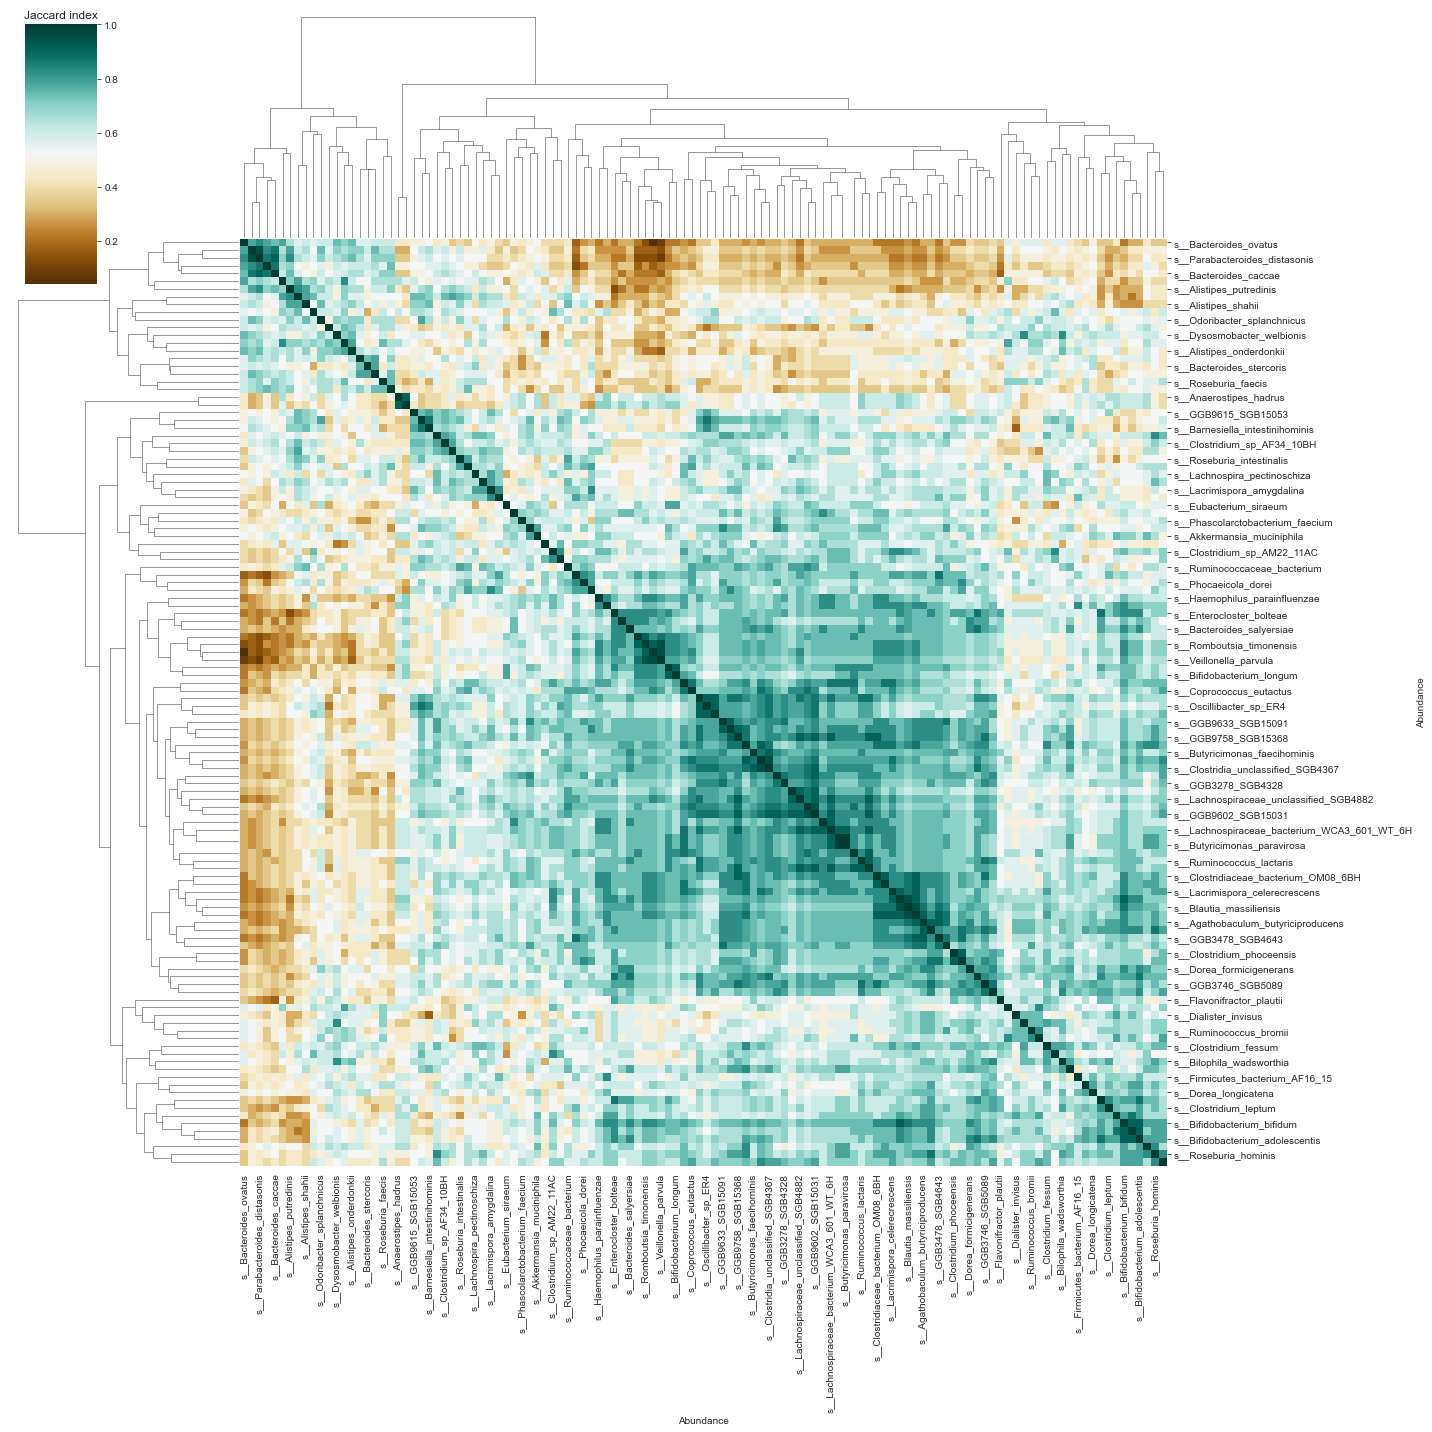

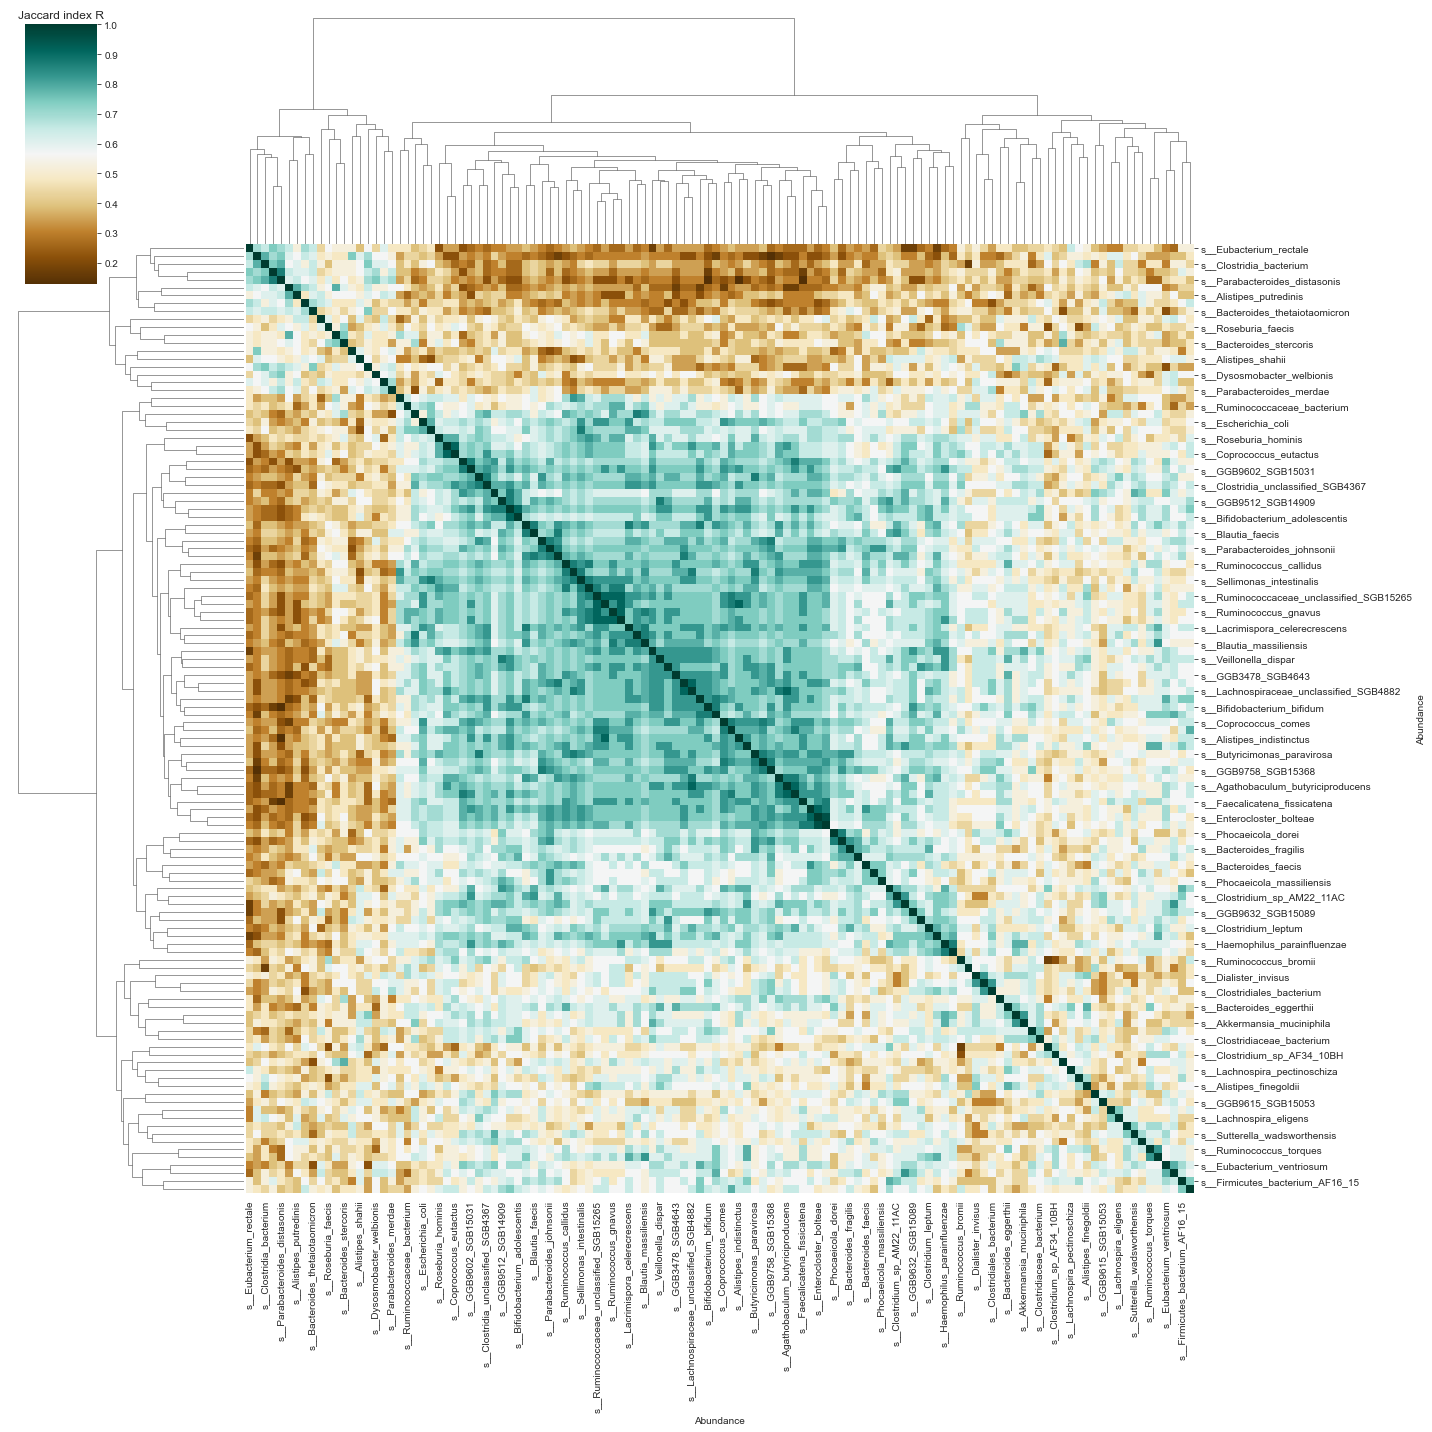

In [32]:
sns.clustermap(jac_sim_Control, cmap='BrBG',figsize=(20, 20))
plt.title('Jaccard index')
plt.show()

cluster_plot_Control_R = sns.clustermap(jac_sim_Control_R, cmap='BrBG', figsize=(20, 20))
plt.title('Jaccard index R')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


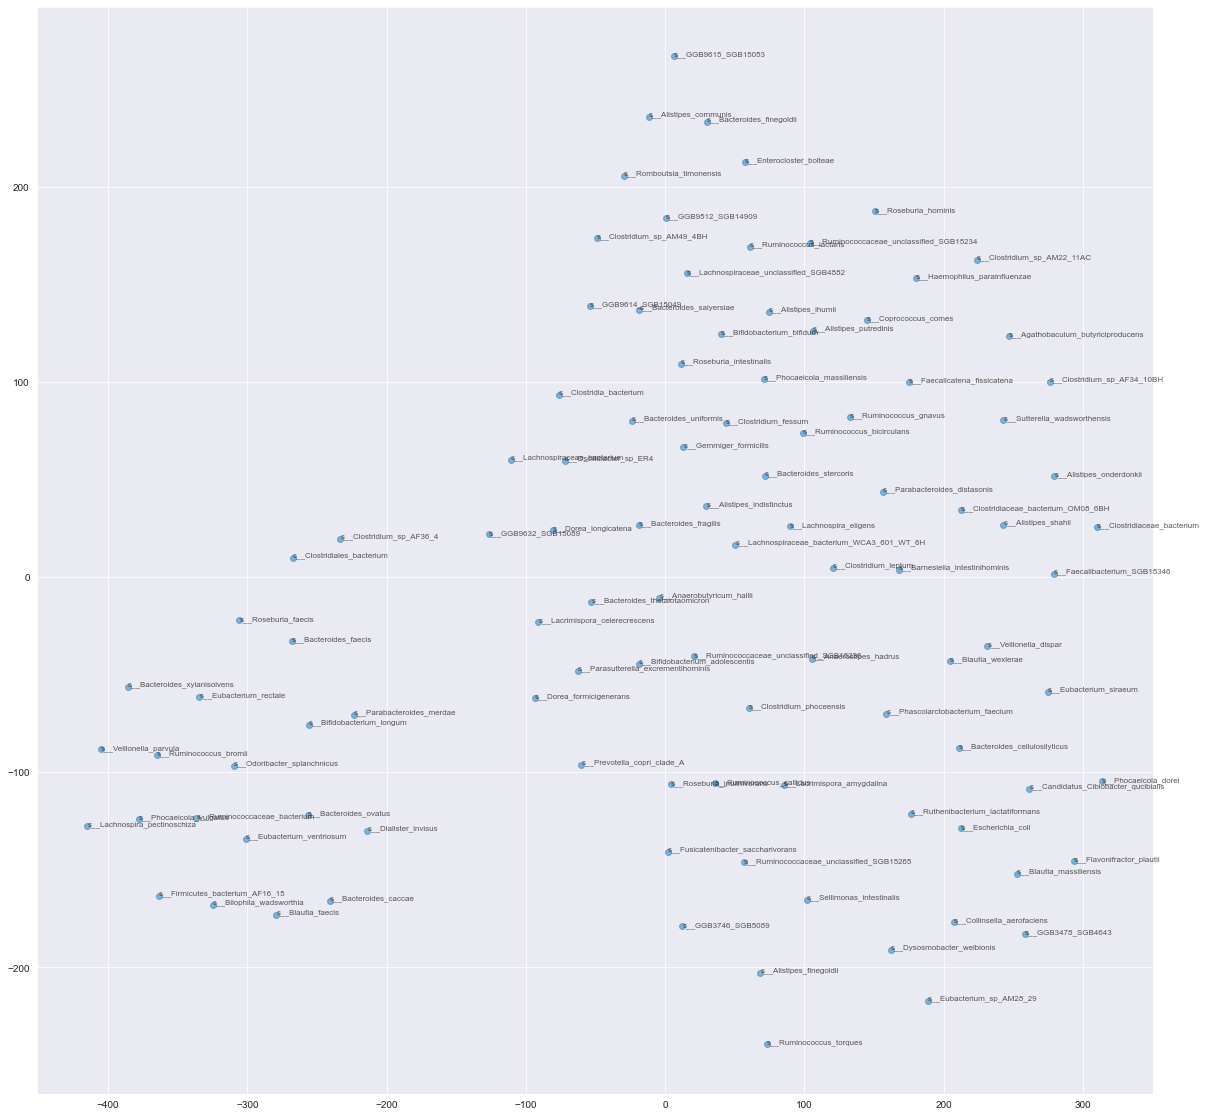

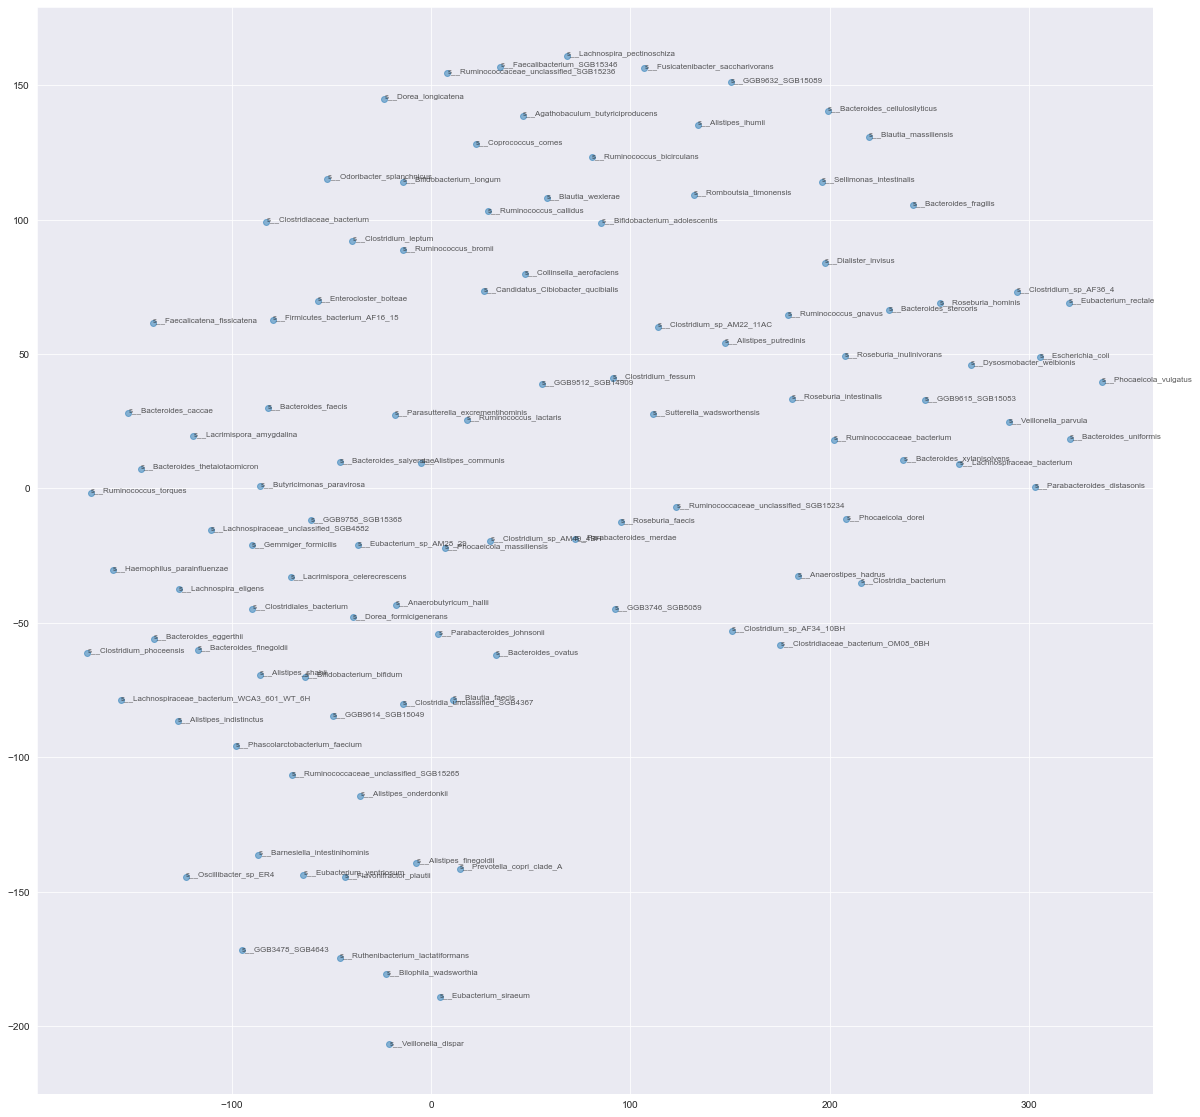

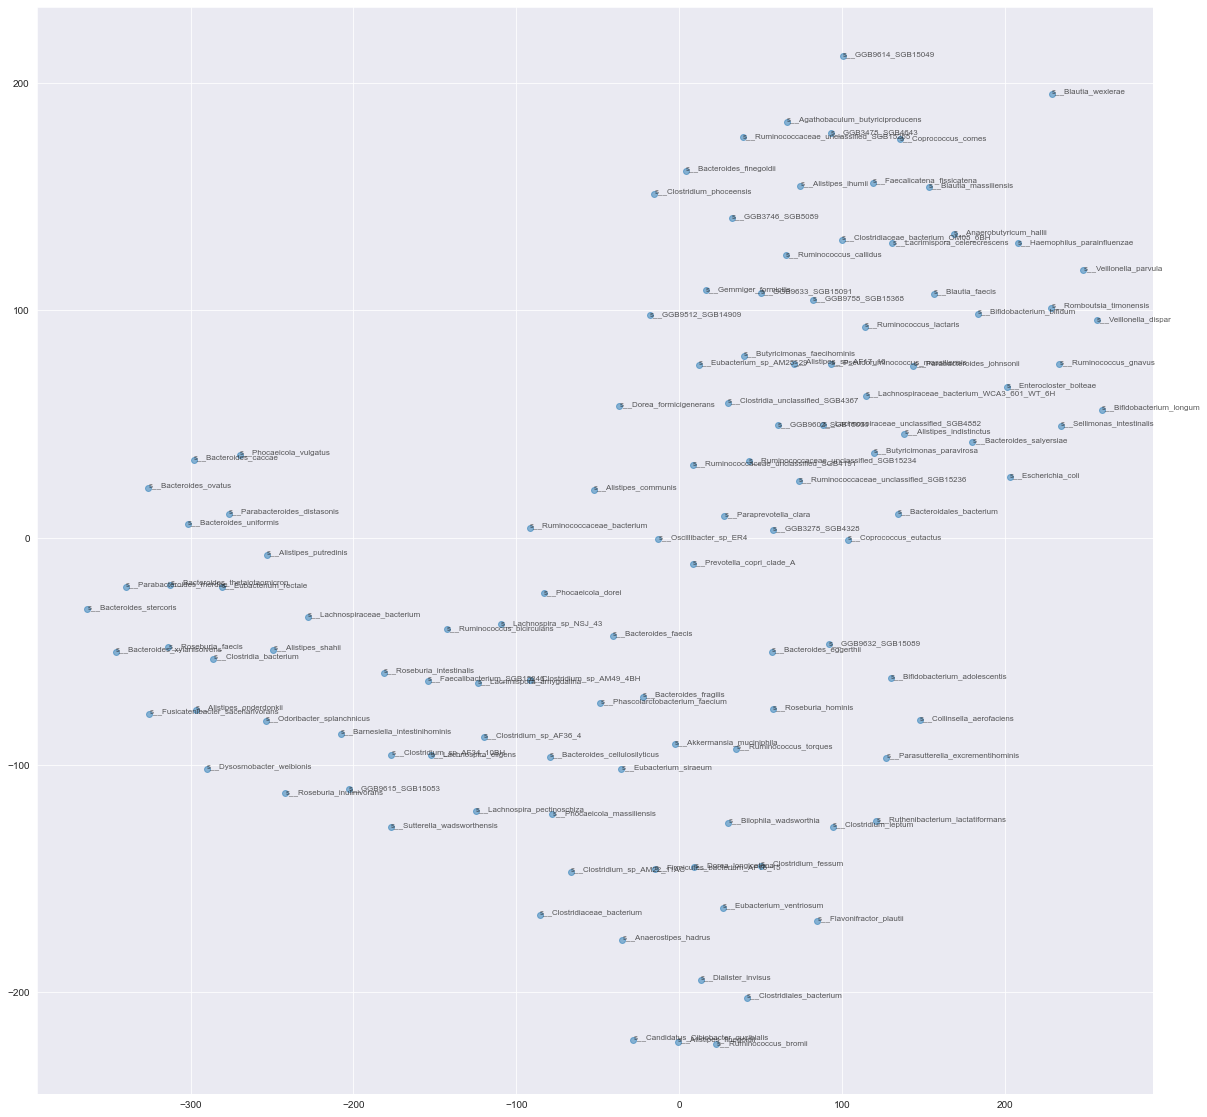

In [41]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=800,random_state=8)

# Apply fit_transform to normalized_movements: tsne_features
Cluster_Species_Pheno = [jac_sim_CD,jac_sim_UC,jac_sim_Control]
for pheno in Cluster_Species_Pheno:
    tsne_features = model.fit_transform(pheno)

    # Select the 0th feature: xs
    xs = tsne_features[:, 0]

    # Select the 1st feature: ys
    ys = tsne_features[:, 1]

    # Scatter plot
    plt.figure(figsize=(20, 20))
    plt.scatter(xs, ys, alpha=0.5)

    # Annotate the points
    for x, y, company in zip(xs, ys, Cluster_Control):
        plt.annotate(company, (x, y), fontsize=8, alpha=0.75)